## How are in demand skills trending for Data Analysts?

### Methodology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of job totals 
3. Plot the monthly skill demand

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("lukebarousse/data_jobs", split="train")

# Convert to a pandas DataFrame
df = dataset.to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df.job_posted_date )
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

# Display the first few rows
df.head()

c:\Users\allen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [21]:
#filter for Nigeria data analyst roles

df_da_ng = df[(df['job_title'] == 'Data Analyst') & (df['job_country']== 'Nigeria')].copy()

In [22]:
#Aggregate by month
df_da_ng['job_posted_month_no'] = df_da_ng['job_posted_date'].dt.month

In [23]:
df_da_ng_explode = df_da_ng.explode('job_skills')

In [24]:
# get a pivot table
df_da_ng_pivot = df_da_ng_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value=0)

# create a new row of total and aggregate by sum
df_da_ng_pivot.loc['Total'] = df_da_ng_pivot.sum()

# sort data
df_da_ng_pivot  = df_da_ng_pivot[df_da_ng_pivot.loc['Total'].sort_values(ascending = False).index]

# dropped the total row so i can plot
df_da_ng_pivot = df_da_ng_pivot.drop('Total')

df_da_ng_pivot

job_skills,excel,sql,tableau,python,power bi,r,sas,word,spss,ruby,...,jira,nosql,php,looker,mysql,react,sap,redshift,powerpoint,scala
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4,1,2,3,4,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,0,0,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,2,3,2,3,0,2,1,0,...,0,0,0,0,0,0,0,0,1,0
5,4,4,3,3,2,2,2,0,1,0,...,0,0,0,1,0,0,0,0,0,1
6,3,2,2,1,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,5,3,3,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,3,3,2,0,2,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
9,6,4,2,2,3,1,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0


want to get df_da_ng_pivot from a count to a percentage

In [25]:
da_total = df_da_ng.groupby('job_posted_month_no').size()

In [26]:
df_da_ng_percent = df_da_ng_pivot.div(da_total/100, axis = 0)
df_da_ng_percent

job_skills,excel,sql,tableau,python,power bi,r,sas,word,spss,ruby,...,jira,nosql,php,looker,mysql,react,sap,redshift,powerpoint,scala
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,80.000000,20.000000,40.000000,60.000000,80.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,33.333333,33.333333,33.333333,0.000000,0.000000,16.666667,33.333333,16.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,40.000000,20.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,62.500000,37.500000,25.000000,37.500000,25.000000,37.500000,0.000000,25.000000,12.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.5,0.000000
5,57.142857,57.142857,42.857143,42.857143,28.571429,28.571429,28.571429,0.000000,14.285714,0.000000,...,0.000000,0.000000,0.000000,14.285714,0.000000,0.000000,0.000000,0.0,0.0,14.285714
6,75.000000,50.000000,50.000000,25.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
7,33.333333,55.555556,33.333333,33.333333,33.333333,22.222222,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
8,40.000000,60.000000,60.000000,40.000000,0.000000,40.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.0,0.0,0.000000
9,54.545455,36.363636,18.181818,18.181818,27.272727,9.090909,0.000000,18.181818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.090909,0.0,0.0,0.000000


In [ ]:
#Change job_posted_month_no to month in letters

df_da_ng_percent = df_da_ng_percent.reset_index()
df_da_ng_percent['job_posted_month'] = df_da_ng_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format= '%m').strftime('%b'))
df_da_ng_percent = df_da_ng_percent.set_index('job_posted_month')
df_da_ng_percent = df_da_ng_percent.drop(columns = 'job_posted_month_no')

df_da_ng_percent

job_skills,excel,sql,tableau,python,power bi,r,sas,word,spss,ruby,...,jira,nosql,php,looker,mysql,react,sap,redshift,powerpoint,scala
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,80.000000,20.000000,40.000000,60.000000,80.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Feb,33.333333,33.333333,33.333333,0.000000,0.000000,16.666667,33.333333,16.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Mar,40.000000,20.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Apr,62.500000,37.500000,25.000000,37.500000,25.000000,37.500000,0.000000,25.000000,12.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.5,0.000000
May,57.142857,57.142857,42.857143,42.857143,28.571429,28.571429,28.571429,0.000000,14.285714,0.000000,...,0.000000,0.000000,0.000000,14.285714,0.000000,0.000000,0.000000,0.0,0.0,14.285714
Jun,75.000000,50.000000,50.000000,25.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Jul,33.333333,55.555556,33.333333,33.333333,33.333333,22.222222,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Aug,40.000000,60.000000,60.000000,40.000000,0.000000,40.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.0,0.0,0.000000
Sep,54.545455,36.363636,18.181818,18.181818,27.272727,9.090909,0.000000,18.181818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.090909,0.0,0.0,0.000000


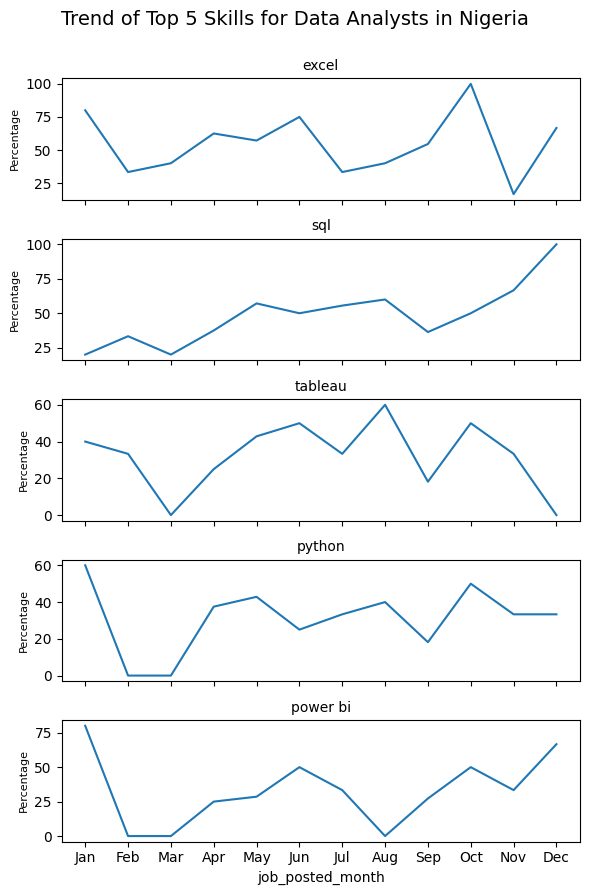

In [73]:
# Create subplots for each skill
fig, ax = plt.subplots(5, 1, figsize=(6, 10), sharex=True)  # Compact figure height

# Plot each skill on its own subplot
for ax, column in zip(ax, df_plot.columns):
    sns.lineplot(data=df_plot, x=df_plot.index, y=column, ax=ax)
    ax.set_title(column, fontsize=10)  
    ax.set_ylabel('Percentage', fontsize=8)  
    ax.grid(False)  

# Global figure title
fig.suptitle('Trend of Top 5 Skills for Data Analysts in Nigeria', fontsize=14, y=0.92)  

# Adjust layout to minimize white space
plt.tight_layout(rect=[0, 0.03, 1, 0.92])  
plt.show()


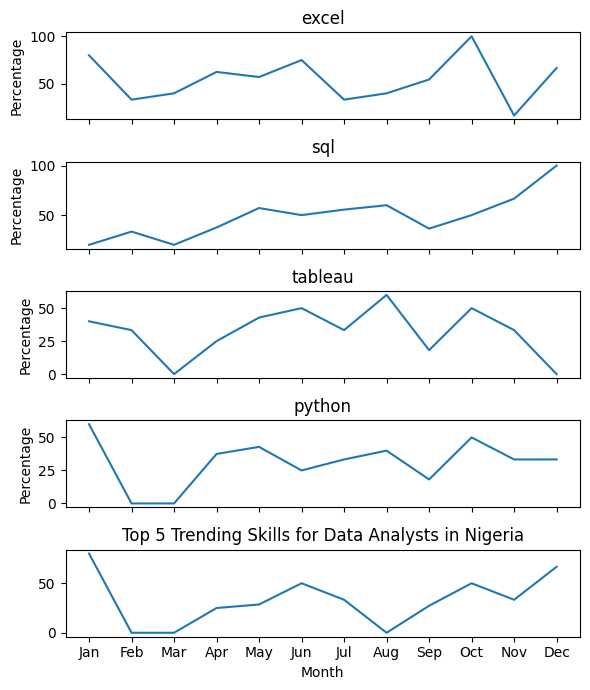

In [52]:
# Create subplots for each skill
fig, axes = plt.subplots(5, 1, figsize=(6, 7), sharex=True)

# Plot each skill on its own subplot
for ax, column in zip(axes, df_plot.columns):
    sns.lineplot(data=df_plot, x=df_plot.index, y=column, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Percentage')

# Adjust layout
plt.title('Top 5 Trending Skills for Data Analysts in Nigeria')
plt.ylabel('')
plt.xlabel('2023')
plt.tight_layout()
plt.xlabel('Month')
plt.grid(False)  
plt.show()
